# <font color='blue'>DATA SCIENCE JOBS: SALARIES AND TYPE OF WORKS MODELS</font>

## Table of contents

1. [Project information](#1.-Project-Information)

2. [Finding all variables and understanding them](#2.-Finding-all-variables-and-understanding-them)

3. [Preprocessing: Data cleaning & transform it](#3.-Preprocessing:-Data-cleaning-&-transform-it)

4. [Create the final DataFrame and save it](#4.-Create-the-final-DataFrame-and-save-it)

## <font color='grey'>1. Project information</font> 

In recent years, data science roles are more demanded, so it's important to understand how they are evolving in terms of positioning as job offers and their salaries.

In this analysis, I will take my first Exploratory Data Analysis (EDA) and visualization project using Python, where I explored data science salaries between 2020 and 2023. 

The "global salary index" dataset comes from the ai-jobs.net website for roles in the AI, ML, Data Science space based on internal data obtanided from surveys and jobs with open salaries.

This dataset is processed and updated on a weekly basis but I'll take the dataset updated on September 29th, 2023.

________

## <font color='grey'>2. Finding all variables and understanding them</font>

### Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pycountry
from pycountry import countries
sns.set_theme()

%matplotlib inline

### Read dataset

In [4]:
read = pd.read_csv('../../data/raw/salaries.csv')
read.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Scientist,130000,CAD,96313,CA,100,CA,S
1,2023,SE,FT,Machine Learning Engineer,250000,USD,250000,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,140000,USD,140000,US,0,US,M
3,2023,MI,FT,Data Analyst,45000,EUR,48585,PT,100,PT,M
4,2023,MI,FT,Data Analyst,40000,EUR,43187,PT,100,PT,M


### Dataset shape and information

In [3]:
print("Number of rows and columns in the dataset:",read.shape)

Number of rows and columns in the dataset: (7595, 11)


In [4]:
# Information about the dataset including the index dtype and columns, non-null values and memory usage
      
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7595 non-null   int64 
 1   experience_level    7595 non-null   object
 2   employment_type     7595 non-null   object
 3   job_title           7595 non-null   object
 4   salary              7595 non-null   int64 
 5   salary_currency     7595 non-null   object
 6   salary_in_usd       7595 non-null   int64 
 7   employee_residence  7595 non-null   object
 8   remote_ratio        7595 non-null   int64 
 9   company_location    7595 non-null   object
 10  company_size        7595 non-null   object
dtypes: int64(4), object(7)
memory usage: 652.8+ KB


In [5]:
# Generate descriptive statistics
      
read.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,7595.000000,7.595000e+03,7595.000000,7595.000000
mean,2022.695721,1.775745e+05,148861.816853,40.283081
std,0.573055,4.872338e+05,64152.942337,48.323066
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2022.000000,1.052000e+05,105000.000000,0.000000
50%,2023.000000,1.440000e+05,142200.000000,0.000000
75%,2023.000000,1.897500e+05,185900.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
# Exploring column names of the dataframe

print("The column names of the dataset are::\n\n",read.columns)

The column names of the dataset are::

 Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


### Missing values

In [7]:
# Exploring if the dataset contains missing values

read.isnull().sum()/len(read)

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

In [8]:
print("Number of missing data in the dataset:",read.isnull().sum().sum())

Number of missing data in the dataset: 0


There is no missing data so it will not be necessary to delete any columns

### Unique values per column

In [9]:
# Exploring unique values per each column of the dataset

print("Number of unique values in columns:\n\n", read.nunique())

Number of unique values in columns:

 work_year                4
experience_level         4
employment_type          4
job_title              118
salary                1294
salary_currency         22
salary_in_usd         1566
employee_residence      85
remote_ratio             3
company_location        73
company_size             3
dtype: int64


With this exploration we can highlight some columns with many unique values, it will be important to analyze if we can work with these data or we will have to group them to reduce the size of the dataset.

- Job_title
- Salary
- Salary_in_usd
- Employee_residence
- Company location

________

## <font color='grey'>3. Preprocessing: Data cleaning & transform it</font>

Once we get all the overall information we can start working with the data and think about what changes we can make to clean up the data or transform it to ensure more meaningful consistency of certain values.

In [10]:
# We need to create a copy of the original dataframe before doing any transformation on the original data
# We will call the new df "data_cleaning" to recognize the process we are working with

data_cleaning0 = read.copy()
data_cleaning0.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Scientist,130000,CAD,96313,CA,100,CA,S
1,2023,SE,FT,Machine Learning Engineer,250000,USD,250000,US,0,US,M


We will have to divide the dataset into numerical and categorical columns.

In [11]:
# Before starting cleaning the numerical data we will need to transform the column "remote_ratio" into an object column

data_cleaning = data_cleaning0.copy()
data_cleaning['remote_ratio'] = data_cleaning['remote_ratio'].apply(str)

data_cleaning.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

## <font color='purple'>Cleaning numerical data</font>


In [12]:
# Create new DataFrame with numericals columns

numericals = data_cleaning.select_dtypes(np.number)
numericals.head()

,work_year,salary,salary_in_usd
0,2023,130000,96313
1,2023,250000,250000
2,2023,140000,140000
3,2023,45000,48585
4,2023,40000,43187


In [13]:
# Check values dtypes

numericals.dtypes

work_year        int64
salary           int64
salary_in_usd    int64
dtype: object

In [14]:
# Count number of distinct elements in the numericals DataFrame 

numericals.nunique()

work_year           4
salary           1294
salary_in_usd    1566
dtype: int64

### "Work_year"

In [15]:
# Check the unique values
numericals["work_year"].value_counts()

work_year
2023    5652
2022    1650
2021     218
2020      75
Name: count, dtype: int64

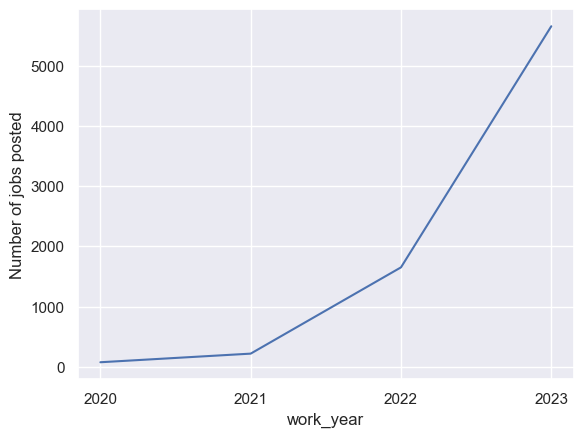

In [16]:
# plot
fig, ax = plt.subplots()
sns.lineplot(x=numericals["work_year"].value_counts().index, y=numericals["work_year"].value_counts().values, ax = ax)
ax.set_ylabel("Number of jobs posted")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

There is a big difference between 2020 and the rest of the years, the data collection probably started at the end of 2020.

### "Salary"

What we can take from the original dataset is that there are two columns that have a number of values well above the rest, the salaries. In this case the data is duplicated because we have the same salary/job title in different currencies.

As the analysis will not be focused on wage differentials between countries it's better to focus the analysis with the same currency for all job titles, in this case we have a column with salaries in USD and we will use it for clearer visibility.

As a consequence, we will remove the "salary" column and change the name of the "salary_in_usd" column to "salary".

- "salary"
- "salary_in_usd"

In [17]:
# Drop "salary" column

numericals.drop(labels=["salary"], axis=1, inplace=True)
numericals.rename(columns={"salary_in_usd": "salary"}, inplace=True)

numericals.head()

,work_year,salary
0,2023,96313
1,2023,250000
2,2023,140000
3,2023,48585
4,2023,43187


### Qualitative approaches to detect outliers

Technique to identify uni-dimensional outliers is to create a boxplot and to see if
there are isolated dots quite far away from the wiskers.

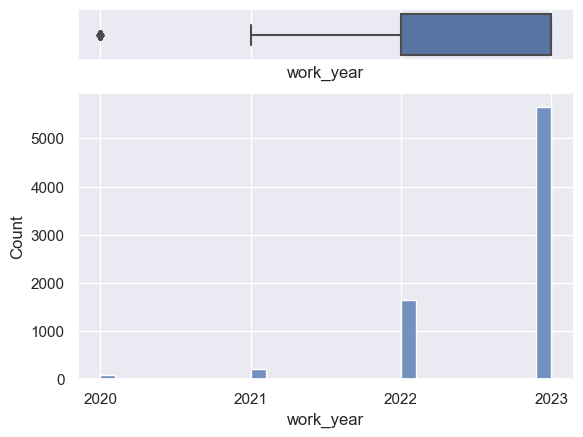

In [18]:
#work_year

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})
sns.boxplot(data=numericals, x="work_year", ax=ax_box) #display boxplot
sns.histplot(data=numericals, x="work_year", ax=ax_hist) #hist of the same column

ax_hist.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_hist.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.show() 

In [19]:
# Compute the skewness
(numericals['work_year'].skew() > 2) or (numericals['work_year'].skew() < -2), numericals['work_year'].skew()

(True, -2.0498072253589252)

We have a negative skew on the "work_year" column.
That means a longer tail on the left side of the distribution, or in other words, is the direction or weight of the distribution. 

We have more values from 2023 on our dataset, and just few from 2020 (outliers).

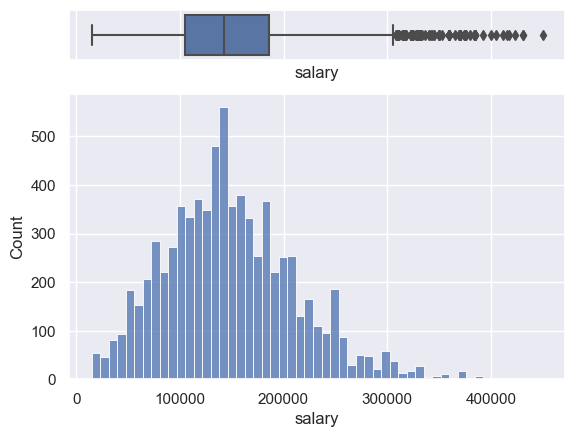

In [20]:
#salary

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})
sns.boxplot(data=numericals, x="salary", ax=ax_box) #display boxplot
sns.histplot(data=numericals, x="salary", ax=ax_hist) #hist of the same column
plt.show() 

In [21]:
# Compute the skewness
(numericals['salary'].skew() > 2) or (numericals['salary'].skew() < -2), numericals['salary'].skew()

(False, 0.6104440945936382)

For the "salary" column we have a little positive skew.
That means a longer tail on the right side of the distribution.
Just few salaries are between 30-40K.

## <font color='purple'>Cleaning categorical datat</font>

Now, we will proceed to pre-processing the categorical data (clean and transformed).

in this case it will not be necessary to apply a "transformer"  (encoded).

In [22]:
# Create new DataFrame with categoricals columns

categoricals = data_cleaning.select_dtypes([object])
categoricals.head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,MI,FT,Data Scientist,CAD,CA,100,CA,S
1,SE,FT,Machine Learning Engineer,USD,US,0,US,M
2,SE,FT,Machine Learning Engineer,USD,US,0,US,M
3,MI,FT,Data Analyst,EUR,PT,100,PT,M
4,MI,FT,Data Analyst,EUR,PT,100,PT,M


In [23]:
categoricals.value_counts()

experience_level  employment_type  job_title                        salary_currency  employee_residence  remote_ratio  company_location  company_size
SE                FT               Data Engineer                    USD              US                  0             US                M               733
                                   Data Scientist                   USD              US                  0             US                M               576
                                                                                                         100           US                M               487
                                   Machine Learning Engineer        USD              US                  0             US                M               432
                                   Data Engineer                    USD              US                  100           US                M               411
                                                                 

Looking at the values included in each column we can see that some of them may be confusing, the current values  don't help us to understand the real meaning.

The columns affected are:

- "experience_level"
- "employment_type"
- "employee_residence"
- "remote_ratio"
- "company_location"
- "company_size"

We will need to evaluate individually to define if we need to replace or group them.

### "Experience_level"

In [24]:
# Check the unique values
categoricals["experience_level"].value_counts()

experience_level
SE    5468
MI    1479
EN     417
EX     231
Name: count, dtype: int64

In [25]:
"""We know that the real meanings per each value are:
    SE - Senior
    MI - Mid
    EN - Entry
    EX - Executive
    
    We need to apply a <.replace> to replace each value with its real meaning """

replace_cat = categoricals.copy()
replace_cat.experience_level.replace(['EN','MI','SE', 'EX'], ['entry', 'mid', 'senior', 'executive'], inplace = True)

In [26]:
# Check if the substitution has been applied correctly

replace_cat["experience_level"].value_counts()

experience_level
senior       5468
mid          1479
entry         417
executive     231
Name: count, dtype: int64

### "Employment_type"

In [27]:
# Check the unique values
categoricals["employment_type"].value_counts()

employment_type
FT    7553
CT      18
PT      13
FL      11
Name: count, dtype: int64

In [28]:
"""We know that the real meanings per each value are:
    FT - Full_time
    CT - Contract
    PT - Part_Time
    FL - Freelance
    
    We need to apply a <.replace> to replace each value with its real meaning """

replace_cat.employment_type.replace(['FT','CT' , 'PT', 'FL'], ['full_time', 'contract', 'part_Time', 'freelance'], inplace = True)

In [29]:
replace_cat['employment_type'].value_counts()

employment_type
full_time    7553
contract       18
part_Time      13
freelance      11
Name: count, dtype: int64

### "Remote_ratio"

In [30]:
# Check the unique values
categoricals["remote_ratio"].value_counts()

remote_ratio
0      4428
100    2952
50      215
Name: count, dtype: int64

In [31]:
"""We know that the real meanings per each value are:
    0 - No_remote/On_site
    50 - Hybrid
    100 - Remote
    
    We need to apply a <.replace> to replace each value with its real meaning """

replace_cat.remote_ratio.replace(['0','50','100'], ['on_site', 'hybrid', 'remote'], inplace = True)

In [32]:
replace_cat['remote_ratio'].value_counts()

remote_ratio
on_site    4428
remote     2952
hybrid      215
Name: count, dtype: int64

### "Company_size"

In [33]:
# Check the unique values
categoricals["company_size"].value_counts()

company_size
M    6757
L     672
S     166
Name: count, dtype: int64

In [34]:
"""We know that the real meanings per each value are:
    S - small
    M - medium
    L - marge
    
    We need to apply a <.replace> to replace each value with its real meaning """

replace_cat.company_size.replace(['S','M','L'], ['small', 'medium', 'large'], inplace = True)

In [35]:
replace_cat["company_size"].value_counts()

company_size
medium    6757
large      672
small      166
Name: count, dtype: int64

### "Salary_currency"

As mentioned above, the salary analysis will be done only with USD currency, that is why we can delete the column "salary_currency" to avoid having data that could create interferences in our analysis.


In [36]:
# Check the unique values
categoricals["salary_currency"].value_counts()

salary_currency
USD    6851
EUR     315
GBP     288
INR      50
CAD      36
AUD      10
PLN       7
SGD       6
CHF       5
BRL       4
JPY       4
DKK       3
TRY       3
HUF       3
THB       2
NOK       2
ILS       1
HKD       1
ZAR       1
PHP       1
MXN       1
CLP       1
Name: count, dtype: int64

In [37]:
replace_cat.drop(["salary_currency"], axis=1, inplace=True)

In [38]:
#Check if the column has been dropped correctly

replace_cat.head()

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,mid,full_time,Data Scientist,CA,remote,CA,small
1,senior,full_time,Machine Learning Engineer,US,on_site,US,medium
2,senior,full_time,Machine Learning Engineer,US,on_site,US,medium
3,mid,full_time,Data Analyst,PT,remote,PT,medium
4,mid,full_time,Data Analyst,PT,remote,PT,medium


### "Employee_residence" & "Company_location"

In [39]:
print("Number of unique values in employee_residence column is:\n\n", categoricals["employee_residence"].nunique())

Number of unique values in employee_residence column is:

 85


In [40]:
print("Number of unique values in company_locations column is:\n\n", categoricals["company_location"].nunique())

Number of unique values in company_locations column is:

 73


We want to replace the codes for locations or country names

Python has a function called "pycountry" (https://pypi.org/project/pycountry/) that provides the ISO databases for countries and others. We know that the <codes> in our database are encoded based on the "ISO" because it's specified in the "Legend" in the web from where we have extracted the database (https://ai-jobs.net/salaries/).

In [41]:
"""We want to replace the locations and countries residence codes 
for employees and companies to reduce the values size.

We will need to use a For Loop to go from code to code and create a new list with the new value names.

We will need to use the library "pycountry":

#Convert country code ISO 3166-1 alpha-2 to country name:
#country_alpha2_to_country_name(cn_name_format="default") 
"""

from pycountry import countries

employee_country = []
company_country = []

for country_code in replace_cat.employee_residence:
   employee_country.append(pycountry.countries.get(alpha_2=country_code).name)

for country_code in replace_cat.company_location:
    company_country.append(pycountry.countries.get(alpha_2=country_code).name)

replace_cat['employee_residence'] = employee_country
replace_cat['company_location'] = company_country


#https://snyk.io/advisor/python/pycountry/functions/pycountry.countries.get

In [42]:
# Check if the replacement from country code to country names has ben placed correctly

replace_cat.head()

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,mid,full_time,Data Scientist,Canada,remote,Canada,small
1,senior,full_time,Machine Learning Engineer,United States,on_site,United States,medium
2,senior,full_time,Machine Learning Engineer,United States,on_site,United States,medium
3,mid,full_time,Data Analyst,Portugal,remote,Portugal,medium
4,mid,full_time,Data Analyst,Portugal,remote,Portugal,medium


### "Job_title"

In [43]:
# Check the unique values for the column "job_title"
categoricals["job_title"].value_counts()

job_title
Data Engineer                    1815
Data Scientist                   1601
Data Analyst                     1148
Machine Learning Engineer         762
Applied Scientist                 212
                                 ... 
BI Data Engineer                    1
Analytics Engineering Manager       1
Data DevOps Engineer                1
AWS Data Architect                  1
Sales Data Analyst                  1
Name: count, Length: 118, dtype: int64

There is a high-cardinality in the "job_title" categorical variables, there are 118 different unique values.

This means that the number of different levels is large relative to the sample size of a data set, or in other words, there are few data points per level.

To reduce the cardinality we will create a new column that groups some of these values together, called "job_area".

Before creating the new column we will need to replace some values names.

In [44]:
# Values replacement name

replace_cat.replace('BI Analyst', 'Business Intelligence Analyst', inplace=True)
replace_cat.replace('BI Developer', 'Business Intelligence Developer', inplace=True)
replace_cat.replace('ML Engineer', 'Machine Learning Engineer', inplace=True)
replace_cat.replace('MLOps Engineer', 'Machine Learning Ops Engineer', inplace=True)
replace_cat.replace('AWS Data Architect', 'Cloud AWS Data Architect', inplace=True)
replace_cat.replace('Azure Data Engineer', 'Cloud Azure Data Engineerr', inplace=True)

replace_cat["job_title"].value_counts()

job_title
Data Engineer                     1815
Data Scientist                    1601
Data Analyst                      1148
Machine Learning Engineer          848
Applied Scientist                  212
                                  ... 
BI Data Engineer                     1
Managing Director Data Science       1
Data DevOps Engineer                 1
Sales Data Analyst                   1
Consultant Data Engineer             1
Name: count, Length: 115, dtype: int64

Once some of the values has been replaced we can proceed to group all the job title in reduced groups to decrease the cardinality.

Grouping will be done in the following groups:

- Business Intelligence
- AI
- Clous
- Data
- Machine Learning
- Research
- Others
    


In [45]:
"""We have created a For Loops function to group all the job_title in different areas

First we create a new list where to add the new values, 
and then we will transform it into a column to add it to the DataFrame

"""


job_area = []
for row in replace_cat["job_title"]:
    if "Business Intelligence" in row: job_area.append('Business Intelligence')
    elif "AI" in row: job_area.append('AI')
    elif "Cloud" in row: job_area.append('Cloud')
    elif "Data" in row: job_area.append('Data')   
    elif "Machine Learning" in row: job_area.append('Machine Learning') 
    elif "Research" in row: job_area.append('Research')         
    else: job_area.append('Others')

In [46]:
# Adding that list as a column in the dataset and printing the final dataset to see the changes. 

replace_cat["job_area"] = job_area
print(job_area)

['Data', 'Machine Learning', 'Machine Learning', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'AI', 'AI', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Others', 'Others', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'AI', 'AI', 'Data', 'Data', 'Research', 'Research', 'Machine Learning', 'Machine Learning', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Research', 'Research', 'Data', 'Data', 'Data', 'Data', 'Research', 'Research', 'Data', 'Data', 'Machine Learning', 'Machine Learning', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'AI', 'AI', 'Others', 'Others', 'Data', 'Data', 'Data', 'Data', 'Data', 'Data', 'AI', 'AI', 'Research', 'Research', 'Data', 'Data', 'Data', 'Data',

In [47]:
#Check the new unique values in the column

replace_cat["job_area"].value_counts()

job_area
Data                     5414
Machine Learning         1017
Others                    536
Research                  341
Business Intelligence     198
AI                         76
Cloud                      13
Name: count, dtype: int64

In [48]:
# Recheck the column names of our DataFrame to confirm that the new one has been added

replace_cat.columns

Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'job_area'],
      dtype='object')

In [49]:
# Check the DataFrame with the new values

replace_cat.tail(500)

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,job_area
7095,senior,full_time,Data Engineer,United States,on_site,United States,medium,Data
7096,executive,full_time,Data Engineer,United States,remote,United States,medium,Data
7097,executive,full_time,Data Engineer,United States,remote,United States,medium,Data
7098,mid,full_time,Data Scientist,United Kingdom,on_site,United Kingdom,medium,Data
7099,mid,full_time,Data Scientist,United Kingdom,on_site,United Kingdom,medium,Data
...,...,...,...,...,...,...,...,...
7590,senior,full_time,Data Scientist,United States,remote,United States,large,Data
7591,mid,full_time,Principal Data Scientist,United States,remote,United States,large,Data
7592,entry,full_time,Data Scientist,United States,remote,United States,small,Data
7593,entry,contract,Business Data Analyst,United States,remote,United States,large,Data


___________

## <font color='grey'>4. Create the final DataFrame and save it</font>

In [50]:
# We use pd.concat to join the numerical and categorical DataFrames transformed and create the final one

data_jobs = pd.concat([numericals, replace_cat], axis=1, join='inner')
data_jobs.head()

,work_year,salary,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,job_area
0,2023,96313,mid,full_time,Data Scientist,Canada,remote,Canada,small,Data
1,2023,250000,senior,full_time,Machine Learning Engineer,United States,on_site,United States,medium,Machine Learning
2,2023,140000,senior,full_time,Machine Learning Engineer,United States,on_site,United States,medium,Machine Learning
3,2023,48585,mid,full_time,Data Analyst,Portugal,remote,Portugal,medium,Data
4,2023,43187,mid,full_time,Data Analyst,Portugal,remote,Portugal,medium,Data


In [51]:
data_jobs.shape

(7595, 10)

In [53]:
# Save DataFrame as .csv

data_jobs.to_csv('data_jobs.csv', index=False)